In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import seaborn as sns
import threading
import os
from scipy import optimize


#plt.style.use('seaborn-deep')
plt.rc('grid', linestyle="--", color='gray')
#plt.rc('xtick', direction = 'in')
#plt.rc('ytick', direction= 'in')
# @working path
FIG_PATH     = '../figs/'
DATA_PATH    = '../code/'

# @global settings
WEB_FIG_DPI  = 600
FIG_DPI      = 800
FIG_EXT      = '.png'
WEB_FIG_EXT  = '.png'

# @global functions
def savefig(handler,name, fig_ext = FIG_EXT, web_fig_ext = WEB_FIG_EXT):
    if name != '':
        handler.savefig(FIG_PATH + name + fig_ext, dpi = FIG_DPI,bbox_inches = 'tight', pad_inches = 0.1)

Populating the interactive namespace from numpy and matplotlib


In [63]:
sec = 1/1.593e3

In [64]:
(3000*10)/6.9e8

4.347826086956522e-05

In [72]:
def load_mdot(name):
    mdot_file = np.loadtxt(name)

    col_names = ['time', 'mdot', 'macc']

    data_frame = {}
    for i, key in enumerate(col_names):
        data_frame[key]=mdot_file[:,i]
    return data_frame


labels = ['$R_{\\rm p}=R_{\\rm t}=2.15 R_\odot$', '$R_{\\rm p}=0.9R_{\\rm t}=1.94 R_\odot$', '$R_{\\rm p}=0.6R_{\\rm t}=1.29 R_\odot$']

names = ['rp1', 'rp09', 'rp06']

mdots = [ load_mdot('../' + name + '/tde.mdot') for name in names]

In [73]:
print(data_frame['time']/sec, data_frame['mdot'])

[2.13108380e+01 4.26398043e+01 6.39477388e+01 ... 3.52917516e+04
 3.52917678e+04 3.52917839e+04] [0. 0. 0. ... 0. 0. 0.]


Text(0, 0.5, '$\\dot{M}$ [M$_{\\odot}$ s$^{-1}$]')

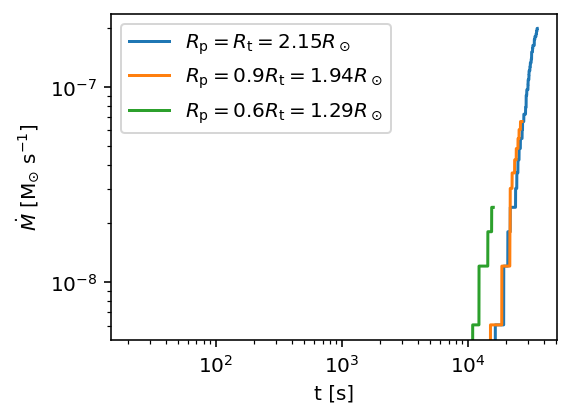

In [76]:
fig = plt.figure(figsize(4,3))
ax = fig.add_subplot(111)

for mdot, l in zip(mdots, labels):
    ax.plot(mdot['time']/sec, mdot['macc']*sec, label=l)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('$\dot{M}$ [M$_{\odot}$ s$^{-1}$]')